Sharkattack assignment

Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset(opens in a new tab). Use all the skills you've learned up until now to answer the following questions as well as possible.

1 What are the most dangerous types of sharks to humans?

2 Are children more likely to be attacked by sharks?

3 Are shark attacks where sharks were provoked more or less dangerous?

4 Are certain activities more likely to result in a shark attack?

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

For each answer you give not only answer the question but also write about the assumptions you made in answering the question. If an assumption or decision possibly created a bias please write about this as well.


In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
url='https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/sharkattack/attacks.csv'
ds_shark_raw = pd.read_csv(url, delimiter=',', encoding='latin1')

In [3]:
ds_shark_raw.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
#some columns have spaces remove by renaming (strpping) all spaces
ds_shark_raw.columns = ds_shark_raw.columns.str.replace(' ', '')

In [5]:
#ds_shark_raw.info()

Question1: What are the most dangerous types of sharks to humans?

Assumption: In answering this I made the assumption that would be highest count on the specie and fatal(Y/N)
Cleansing: observations have  been removed for unfilled observations. categorizing has been done for specie

Answer: White Shark attacks humans the most also with the hightest fatal


In [6]:
# data cleansing question 1
# step1 remove empty Species. and useless other observations
# Those records are useless

prep1 = ds_shark_raw.dropna(subset=['Species'])
prep1 = prep1[~prep1['Species'].str.contains('invalid', case =False)]


#step 2 replace values for right category
prep1.loc[prep1['Species'].str.contains('white', case=False), 'Species' ] = 'White Shark'
prep1.loc[prep1['Species'].str.contains('tiger', case=False), 'Species'] = 'Tiger Shark'
prep1.loc[prep1['Species'].str.contains('blue', case=False), 'Species'] = 'Blue Shark'
prep1.loc[prep1['Species'].str.contains('bull', case=False), 'Species'] = 'Bull Shark'
prep1.loc[prep1['Species'].str.contains('dusky', case=False), 'Species'] = 'Dusky Shark'
prep1.loc[prep1['Species'].str.contains('grey', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('gummy', case=False), 'Species'] = 'Gummy Shark'
prep1.loc[prep1['Species'].str.contains('nurse', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('hammer', case=False), 'Species'] = 'Hammerhead Shark'
prep1.loc[prep1['Species'].str.contains('dog', case=False), 'Species'] = 'Piked Spurdog'

prep1.loc[prep1['Species'].str.contains('not cofirmed', case=False), 'Species'] = 'Unknown'
prep1.loc[prep1['Species'].str.contains('unconfirmed', case=False), 'Species'] = 'Unknown'

# category filled ok for 85% observation
(prep1.groupby(['Species']).size().sort_values(ascending=[False]).head(10))

# cotegory filled ok for over 90%
#(prep1.groupby(['Fatal(Y/N)']).size().sort_values(ascending=[False]).head(10))

#prep1.info()


Species
White Shark                                           667
Tiger Shark                                           283
Bull Shark                                            178
Grey Nurse Shark                                      122
Shark involvement prior to death was not confirmed    105
Shark involvement not confirmed                        88
Unknown                                                75
Blue Shark                                             56
Hammerhead Shark                                       48
4' shark                                               40
dtype: int64

<Axes: title={'center': 'Dangerous types of sharks to humans'}, xlabel='Species', ylabel='number of incidents'>

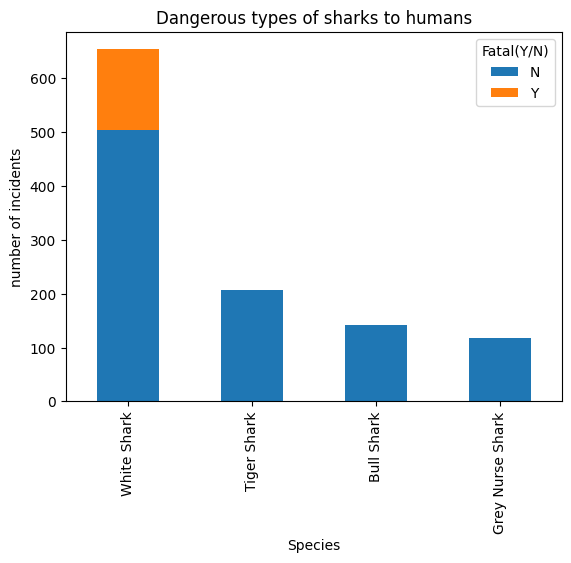

In [7]:
#solution 1: Aggregate on Species in descending order and do a count (size in pandas), take top5 and plot
tussen_resultaat = (prep1
 .groupby(['Species','Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 #.reset_index(name='count')
 .head(5)
)

# series pivot to dataframe
# -1 gaat de laatste kolom pivotten zodat fatal count
# gesplits wordt in aantal N of Y
# index blijft species nodig voor de x-as
ds_ready_for_plot = tussen_resultaat.unstack(level=-1)

#plotten maar
ds_ready_for_plot.plot(kind='bar',stacked=True
                       , title='Dangerous types of sharks to humans'
                       , ylabel='number of incidents')



Question 2: Are children more likely to be attacked by sharks?
Assumption: Categorize all left observations by Age group Adult vs Young and do a count. Create a new column based on this and use this in the final result
Data Cleansing: see below prep 2

Answer: Yes chlidren are attacked more than adults

In [43]:
# data cleansing question 2

prep2 = prep1.copy()

# # prep2.info()
# (prep2.Age.unique()

# datafix age extract number from string
prep2['Age_datafix'] = prep2['Age'].str.extract('(\d+)').apply(pd.to_numeric)

prep2['Age_group'] = prep2['Age_datafix'].apply(lambda x: 'Adult' if x>18 else 'Child'  )

#prep2.groupby(['Age_group']).size()

Age_group
Adult    1548
Child    1813
dtype: int64

<Axes: title={'center': 'shark attack Age group'}, xlabel='Age group', ylabel='number of incidents'>

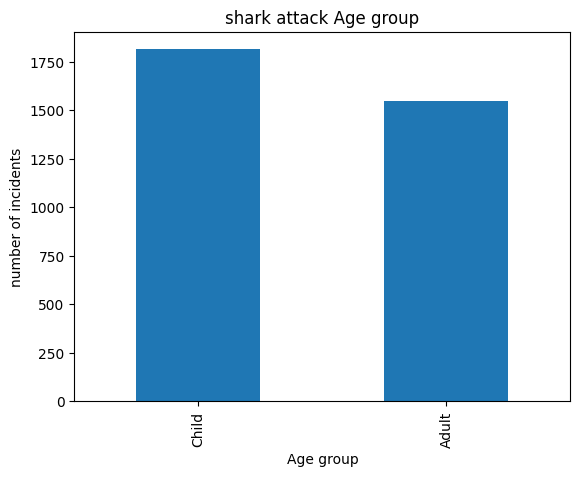

In [44]:
#Solution 2
# aggregate on age do a count in descending order. take top 6 and plot
(prep2
 .groupby('Age_group')
 .size()
 .sort_values(ascending=[False])
 .head(10)
 .plot(kind = "bar", title='shark attack Age group', ylabel='number of incidents', xlabel='Age group')
)

Question 3: Are shark attacks where sharks were provoked more or less dangerous?
Assumption: In this case we need to look more variables. I would do count by Typeand Fatal (Y/N) and take the top 5 and plot it
Answer: Shark are Unprovoked more dangerous

In [61]:
prep3 = prep2.copy()

In [87]:
#data fixes prep3
(prep3
 .groupby(['Type'])
 .size()
)

# Type
# Boat             112
# Boating          136
# Invalid          423
# Provoked         412
# Questionable       2
# Sea Disaster      35
# Unprovoked      2241

# prep3 = prep3[~prep3['Type'].str.contains('boat', case =False)]
# prep3 = prep3[~prep3['Type'].str.contains('questionable', case =False)]
# prep3 = prep3[~prep3['Type'].str.contains('sea', case =False)]
# prep3 = prep3[~prep3['Type'].str.contains('invalid', case =False)]



prep3 = prep3[~prep3['Fatal(Y/N)'].str.contains('unknown', case =False, na=False)]
prep3 = prep3[~prep3['Fatal(Y/N)'].str.contains('M', case =False, na=False)]
prep3 = prep3[~prep3['Fatal(Y/N)'].str.contains('2017', case =False, na=False)]


prep3['Fatal(Y/N)']  = prep3['Fatal(Y/N)'].str.replace(':','N', regex=True)

# (prep3
#  .groupby(['Type'])
#  .size()
# )

(prep3
 .groupby(['Fatal(Y/N)'])
 .size()
)

Fatal(Y/N)
 N       5
N     2234
Y      397
dtype: int64

In [58]:
#solution 1: Aggregate on Species in descending order and do a count (size in pandas), take top5 and plot
tussen_resultaat_3 = (prep3
 .groupby(['Type','Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 #.reset_index(name='count')
 .head(5)
)
tussen_resultaat_3

# series pivot to dataframe
# -1 gaat de laatste kolom pivotten zodat fatal count
# gesplits wordt in aantal N of Y
# index blijft species nodig voor de x-as
#ds_ready_for_plot_3 = tussen_resultaat_3.unstack(level=-1)


# #plotten maar
# ds_ready_for_plot_3.plot(kind='bar',stacked=True
#                        , title='Dangerous types of sharks to humans'
#                        , ylabel='number of incidents')

Type        Fatal(Y/N)
Unprovoked  N             1835
Provoked    N              399
Unprovoked  Y              390
            UNKNOWN         10
Provoked    Y                7
dtype: int64

<Axes: title={'center': 'Dangerous shark attacks provoked or unprovoked'}, ylabel='number of incidents'>

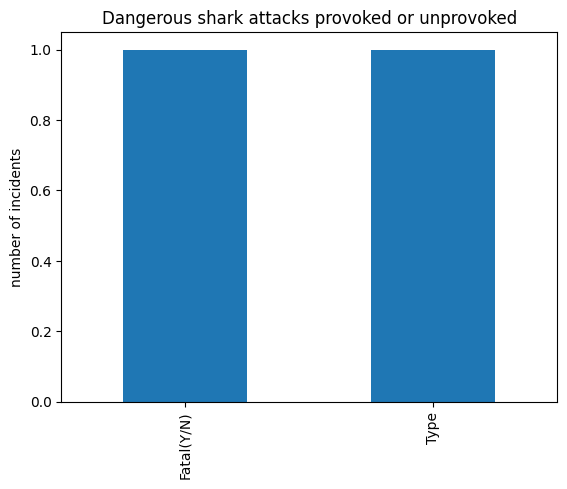

In [53]:
#solution 3
# aggregate on type and injury do a count in descending order. take top 6 and plot
(ds_ready_for_plot_3
 .groupby(['Type', 'Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 .head(5)
 .plot(kind = 'bar', stacked=True,  title="Dangerous shark attacks provoked or unprovoked", ylabel="number of incidents")
)

Question4: Are certain activities more likely to result in a shark attack?
Assumption: Take activity and Type and do count.
Datacleansing: replace values of activity and categorize
Answer: Swimming and Surfing, fishing and diving are all dangerous unprovoked.

In [ ]:
prep4 = prep3.copy()

 # prep2.info()
#(prep4.Activity.unique())

In [ ]:


prep4.dropna(subset=['Activity'], inplace = True)


#step 2 replace values for right category
prep4.loc[prep4['Activity'].str.contains('paddling', case=False), 'Activity' ] = 'Paddling'
prep4.loc[prep4['Activity'].str.contains('surfing', case=False), 'Activity' ] = 'Surfing'
prep4.loc[prep4['Activity'].str.contains('diving', case=False), 'Activity' ] = 'Diving'
prep4.loc[prep4['Activity'].str.contains('swimming', case=False), 'Activity' ] = 'Swimming'
prep4.loc[prep4['Activity'].str.contains('fishing', case=False), 'Activity' ] = 'Fishing'

(prep4.Activity.unique())


array(['Paddling', 'Surfing', 'Diving', 'Swimming', 'Fishing', 'Walking',
       'Feeding sharks', 'Paddle-skiing', 'Body boarding',
       'Stand-Up Paddleboarding', 'Wading', 'Cleaning fish', 'Snorkeling',
       '2 boats capsized', 'Night bathing', 'Kayaking', 'SUP',
       'Touching a shark', 'Attempting to lasso a shark', 'Photo shoot',
       'Washing hands', 'Grabbing shark for a selfie', 'Tagging sharks',
       'Surf skiing ', 'Floating', 'SUP Foil boarding', 'Lobstering',
       'Floating in tube', 'Standing', 'Teasing a shark', 'Surf-skiing',
       'Feeding stingrays?', 'Paddle boarding', 'Treading water',
       'Body boarding ', 'Playing in the water', 'Body Boarding',
       'Boogie boarding', 'Playing', 'Attempting to rescue a shark',
       'Photographing the shark', 'Standing / Snorkeling',
       'Hand feeding sharks', 'Sitting in the water',
       'Transatlantic Rowing', 'Rowing', 'Filming',
       'Standing in inner tube', 'Kayaking ', 'Feeding fish',
       'Kite

<Axes: title={'center': 'Shark attack by activity and type'}, xlabel='Activity,Type', ylabel='number of incidents'>

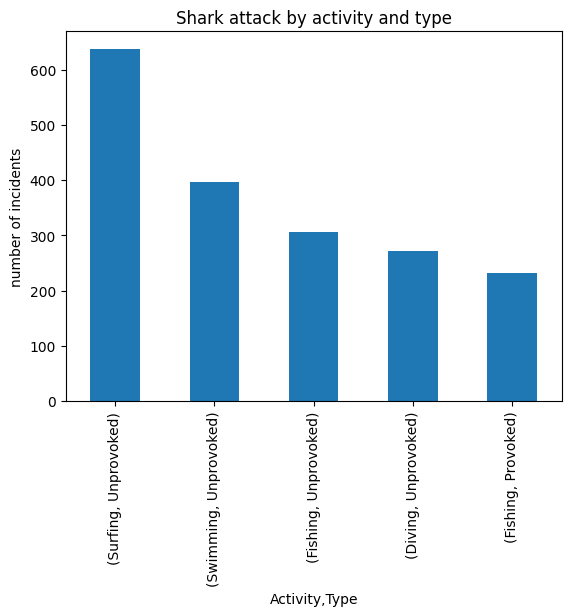

In [ ]:
#solution 4
# aggregate on type and injury do a count in descending order. take top 5 and plot
(prep4
 .groupby(['Activity', 'Type'])
 .size()
 .sort_values(ascending=[False])
 .head(5)
 .plot(kind = 'bar', title="Shark attack by activity and type", ylabel="number of incidents")
)